# 1 -----------Preparation------------------------

## 1.1 Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.2 Custom functions

In [2]:
def numerical_dqr(df):
  
  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]
    
  #join columns 
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)
  
  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
   
  #rreturn report
  return(dq_report_num)

In [3]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(raw[categorical].columns.values):
    count_values.loc[row] = [raw[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(raw[categorical].columns.values):
    unique_values.loc[row] = [raw[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(raw[categorical].columns.values): 
    mode_values.loc[row] = [raw[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = raw[row].mode().iat[0]
    ModeFreq = raw[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(raw[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [4]:
def duplicate_checker(df):
  duplicates = df.duplicated(keep = 'first').sum()
  print("Number of duplicates: {}".format(duplicates))
  print("Total number of records: {}".format(len(df)))
  print("Percentage duplicated: {}".format((duplicates/len(df))*100))

## 1.3 Load Data

In [5]:
#import data
train = pd.read_csv('train.csv', index_col= 'PassengerId')
test = pd.read_csv('test.csv', index_col= 'PassengerId')

In [6]:
#concatenate train and test for data visualization
raw = pd.concat([train, test])
raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 -----------EDA + New features---------------

In [7]:
EDA= raw.copy()

## 2.1 General overview

In [8]:
EDA['Pclass']= EDA['Pclass'].astype('object')
EDA['Age']= np.rint(EDA['Age'])

In [9]:
numerical_dqr(EDA)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
Survived,float64,891,2,418,31.9,0.4,0.0,0.0,0.0,1.0,1.0
Age,float64,1046,73,263,20.1,29.9,0.0,21.0,28.0,39.0,80.0
SibSp,int64,1309,7,0,0.0,0.5,0.0,0.0,0.0,1.0,8.0
Parch,int64,1309,8,0,0.0,0.4,0.0,0.0,0.0,0.0,9.0
Fare,float64,1308,281,1,0.1,33.3,0.0,7.9,14.5,31.3,512.3


In [10]:
categorical_dqr(EDA)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
Pclass,object,1309,3,0,0.0,3,709,54.2
Name,object,1309,1307,0,0.0,"Connolly, Miss. Kate",2,0.2
Sex,object,1309,2,0,0.0,male,843,64.4
Ticket,object,1309,929,0,0.0,CA. 2343,11,0.8
Cabin,object,295,186,1014,77.5,C23 C25 C27,6,2.0
Embarked,object,1307,3,2,0.2,S,914,69.9


In [11]:
duplicate_checker(EDA)

Number of duplicates: 0
Total number of records: 1309
Percentage duplicated: 0.0


## 2.2 Sex+ Embarked

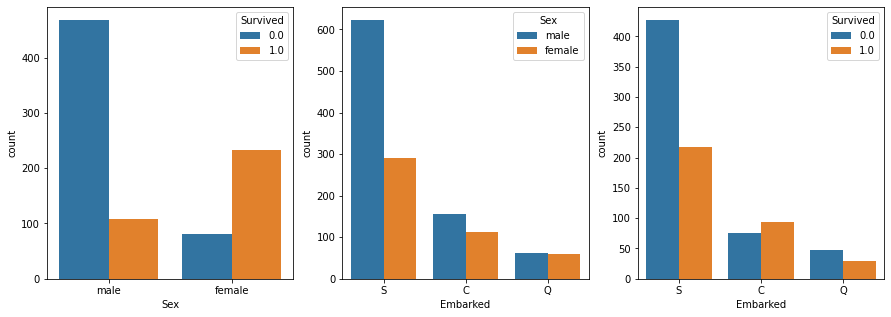

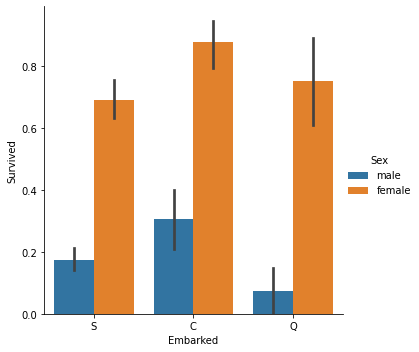

In [12]:
fig, axs = plt.subplots(1,3, figsize= (15,5))
sns.countplot(x="Sex", hue= 'Survived', data= EDA, ax= axs[0])

sns.countplot(x="Embarked", hue= 'Sex', data= EDA, ax= axs[1])

sns.countplot(x="Embarked", hue= 'Survived', data= EDA, ax= axs[2])

sns.catplot(x="Embarked", y="Survived", hue="Sex", kind="bar", data=EDA)

## 2.3 Pclass

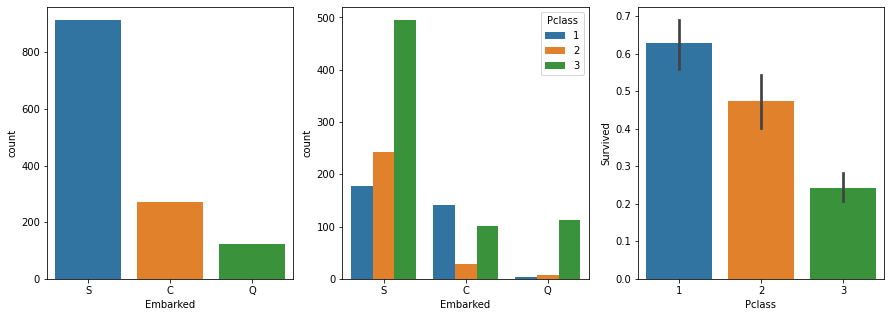

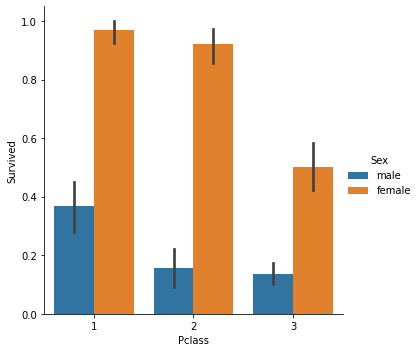

In [13]:
fig, axs = plt.subplots(1,3, figsize= (15,5))

sns.countplot(x="Embarked", data= EDA, ax= axs[0])
sns.countplot(x="Embarked", hue= 'Pclass', data= EDA, ax= axs[1])
sns.barplot(x='Pclass', y='Survived', data=EDA, ax= axs[2])
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=EDA)

## 2.4 Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

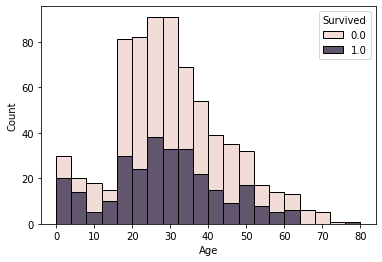

In [14]:
sns.histplot(data=EDA, x="Age", hue="Survived", multiple="stack")

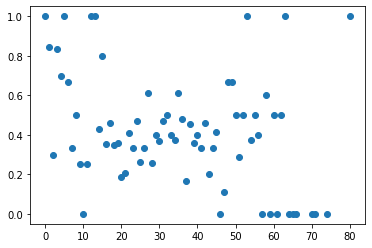

In [15]:
age_survival_probability= EDA.groupby('Age').sum()['Survived']/EDA.groupby('Age').count()['Survived']
x= age_survival_probability.index
y= age_survival_probability

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.scatter(x ,y)

As we see, the younger you are, the higher chance to survive

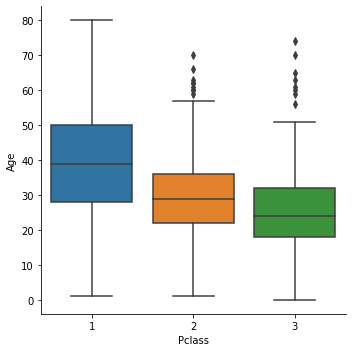

In [16]:
sns.catplot(x="Pclass", y="Age", kind="box", data=EDA)

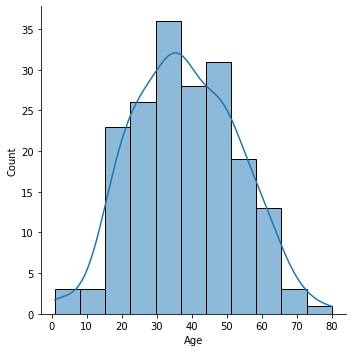

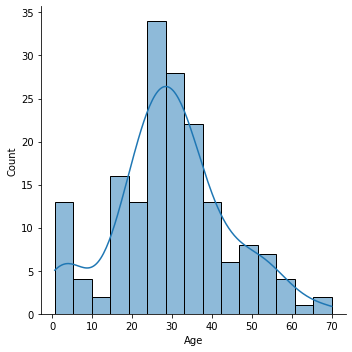

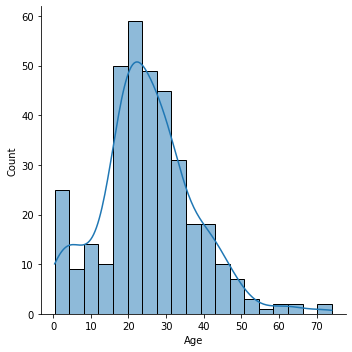

In [17]:
temp= train[train['Pclass']== 1]
sns.displot(temp['Age'], kde= True)
temp= train[train['Pclass']== 2]
sns.displot(temp['Age'], kde= True)
temp= train[train['Pclass']== 3]
sns.displot(temp['Age'], kde= True)

## 2.5 Cabin

In [18]:
EDA['Cabin'].value_counts().head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
Name: Cabin, dtype: int64

In [19]:
EDA['Cabin'].fillna(0, inplace= True)
EDA['cabin_class']= EDA['Cabin'].astype(str).str[0]
EDA['cabin_class'].value_counts()

0    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_class, dtype: int64

In [20]:
EDA['cabin_class'].replace({'G': '0','T': '0'}, inplace= True)

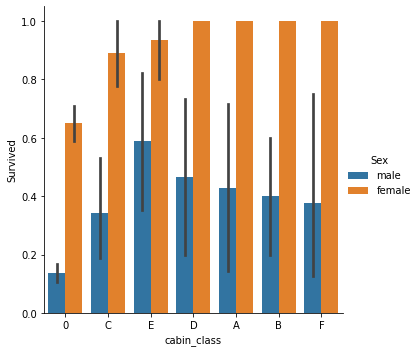

In [21]:
sns.catplot(x="cabin_class", y="Survived", hue="Sex", kind="bar", data=EDA)

As we see, passengers with cabin type have higher chance to survive
Besides, E type has the highest number of male survived

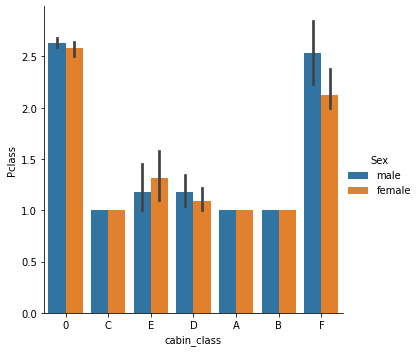

In [22]:
sns.catplot(x="cabin_class", y="Pclass", hue="Sex", kind="bar", data=EDA)

A, B, C cabins are first-class only, E and D are mostly first, while F and '0' are around 2-3

Text(0.5, 1.0, 'Without 0')

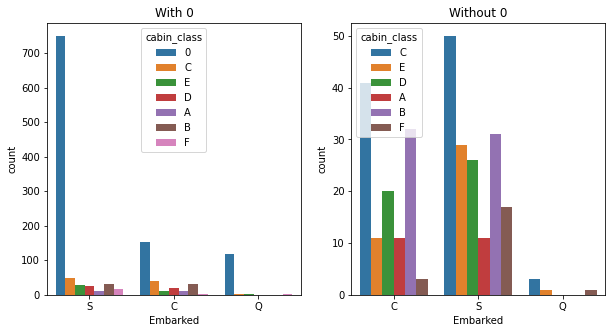

In [23]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
sns.countplot(x="Embarked", hue= 'cabin_class',ax= axs[0], data= EDA)
axs[0].set_title('With 0')
sns.countplot(x="Embarked", hue= 'cabin_class', ax= axs[1], data= EDA[EDA['cabin_class']!= '0'])
axs[1].set_title('Without 0')

## 2.6 Ticket

In [24]:
EDA['Ticket'].value_counts().head(15)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
347077           7
347082           7
3101295          7
19950            6
113781           6
347088           6
382652           6
4133             5
W./C. 6608       5
PC 17757         5
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='Ticket', ylabel='count'>

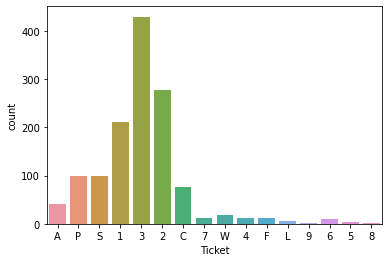

In [25]:
temp= EDA['Ticket'].astype(str).str[0]
sns.countplot(x= temp)

In [26]:
temp.replace({'7':'other', 'W':'other', '4':'other', 'F':'other', 'L':'other', '9':'other','6':'other', '5':'other', '8':'other'}, inplace= True)

EDA['Ticket_first_symbol']= temp

<AxesSubplot:xlabel='Ticket_first_symbol', ylabel='count'>

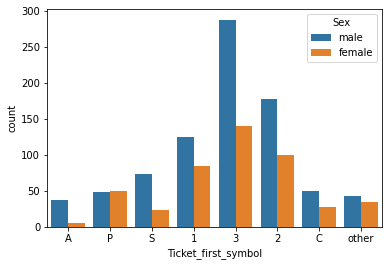

In [27]:
sns.countplot(x= 'Ticket_first_symbol', hue= 'Sex', data= EDA)

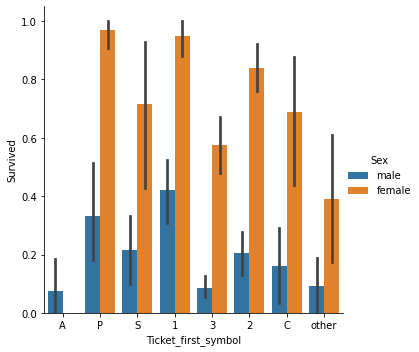

In [28]:
sns.catplot(x= 'Ticket_first_symbol', y="Survived", hue="Sex", kind="bar", data=EDA)

<AxesSubplot:xlabel='Ticket', ylabel='count'>

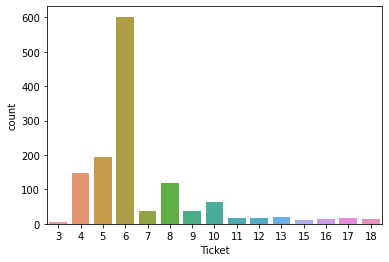

In [29]:
temp= EDA['Ticket'].astype(str).str.len()
sns.countplot(x= temp)

In [30]:
EDA['Ticket_length']= temp.apply(lambda x: 'other' if (x > 8 or x == 7 or x == 3) else x)

<AxesSubplot:xlabel='Ticket_length', ylabel='count'>

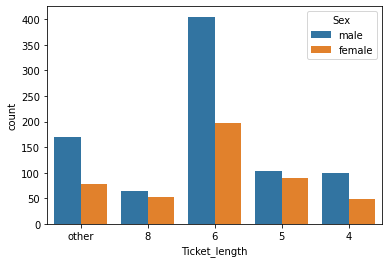

In [31]:
sns.countplot(x= 'Ticket_length', hue= 'Sex', data= EDA)

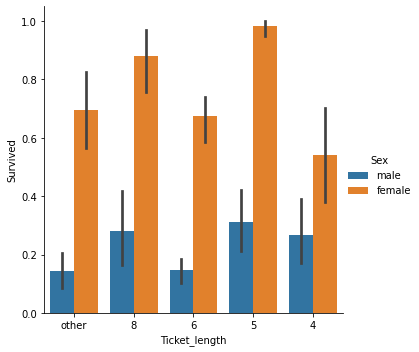

In [32]:
sns.catplot(x= 'Ticket_length', y="Survived", hue="Sex", kind="bar", data=EDA)

In [33]:
EDA.drop(columns= ['Ticket', 'Name', 'Cabin'], inplace= True)
EDA.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length
PassengerId,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,0,A,other
2,1.0,1,female,38.0,1,0,71.2833,C,C,P,8
3,1.0,3,female,26.0,0,0,7.9250,S,0,S,other
4,1.0,1,female,35.0,1,0,53.1000,S,C,1,6
5,0.0,3,male,35.0,0,0,8.0500,S,0,3,6


## 2.7 Fare + delete outliers

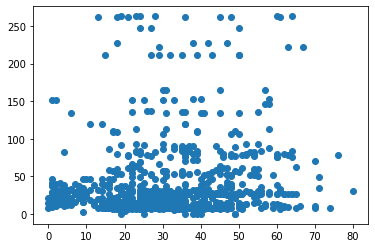

In [111]:
plt.scatter(x= 'Age', y= 'Fare', data= EDA)

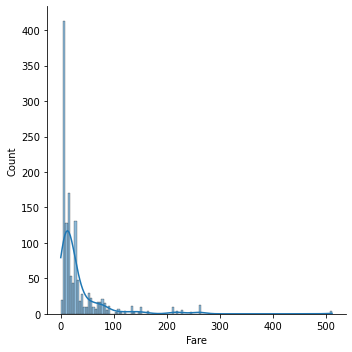

In [34]:
temp= EDA['Fare']
sns.displot(temp, kde= True)

seems like there are outliers

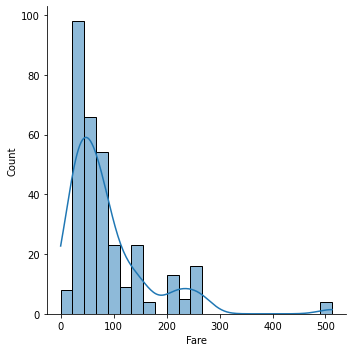

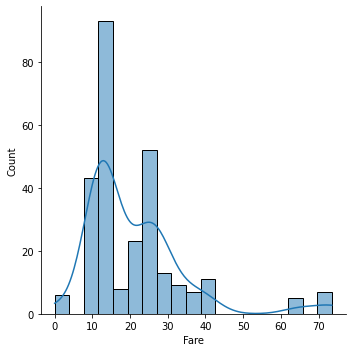

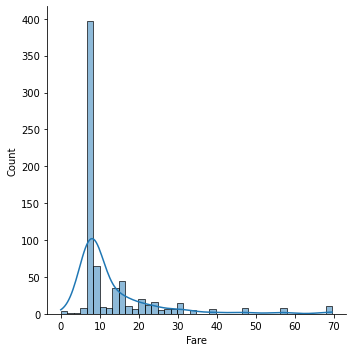

In [35]:
for i in range(1,4):
    temp= EDA[EDA['Pclass']== i]
    sns.displot(temp['Fare'], kde= True)

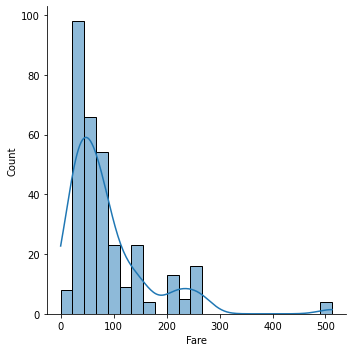

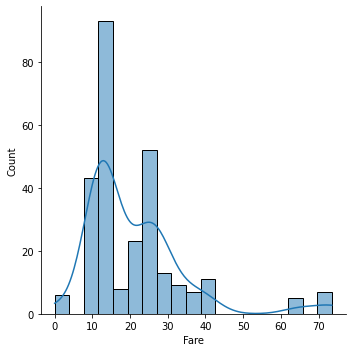

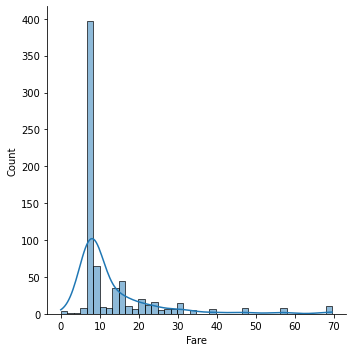

In [36]:
temp= EDA[EDA['Pclass']== 1]
sns.displot(temp['Fare'], kde= True)
temp= EDA[EDA['Pclass']== 2]
sns.displot(temp['Fare'], kde= True)
temp= EDA[EDA['Pclass']== 3]
sns.displot(temp['Fare'], kde= True)

let's check z-scores, if there are any, they are right-sided

In [37]:
temp= EDA[EDA['Pclass']== 1]['Fare']
z= temp.apply(lambda x: (x-temp.mean())/temp.std())
z.max()

5.28073473310326

In [38]:
temp= EDA[EDA['Pclass']== 2]['Fare']
z= temp.apply(lambda x: (x-temp.mean())/temp.std())
z.max()

3.845104306154193

In [39]:
temp= EDA[EDA['Pclass']== 3]['Fare']
z= temp.apply(lambda x: (x-temp.mean())/temp.std())
z.max()

4.893453734476122

so, there are some right-side outliers (probably people who paid for their whole family, that's why there are 0s)

values dropped: 4
values dropped: 12
values dropped: 20


0

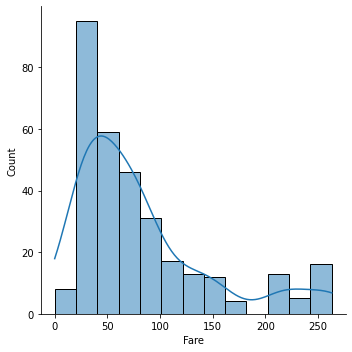

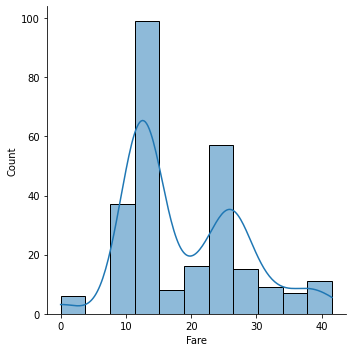

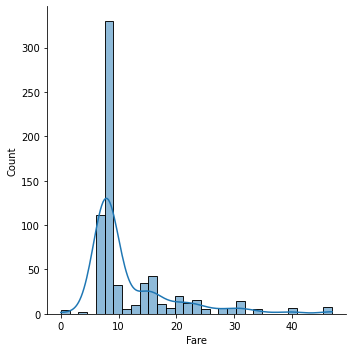

In [40]:
temp= EDA[EDA['Pclass']== 1]['Fare']
z1= temp.apply(lambda x: np.nan if ((x-temp.mean())/temp.std()) > 3 else x)
sns.displot(z1, kde= True)
print('values dropped:', z1.isnull().sum() )
z1.fillna(temp.mean(), inplace= True)

temp= EDA[EDA['Pclass']== 2]['Fare']
z2= temp.apply(lambda x: np.nan if ((x-temp.mean())/temp.std()) > 3 else x)
sns.displot(z2, kde= True)
print('values dropped:', z2.isnull().sum() )
z2.fillna(temp.mean(), inplace= True)

temp= EDA[EDA['Pclass']== 3]['Fare']
z3= temp.apply(lambda x: np.nan if ((x-temp.mean())/temp.std()) > 3 else x)
sns.displot(z3, kde= True)
print('values dropped:', z3.isnull().sum() )
z3.fillna(temp.mean(), inplace= True)



z= pd.concat([z1,z2,z3])
EDA['Fare']= z
z.isnull().sum()

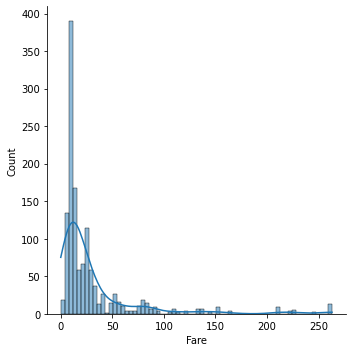

In [41]:
sns.displot(EDA['Fare'], kde= True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

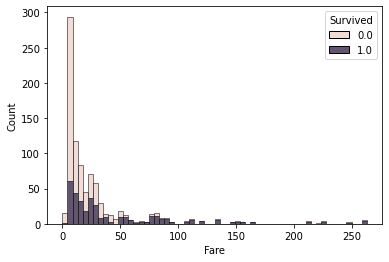

In [42]:
sns.histplot(data=EDA, x="Fare", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

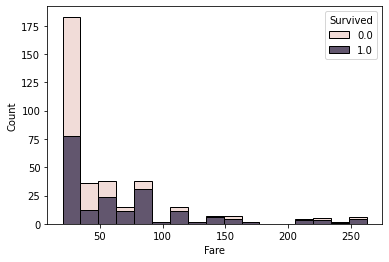

In [43]:
sns.histplot(data=EDA[EDA['Fare']> 20], x="Fare", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

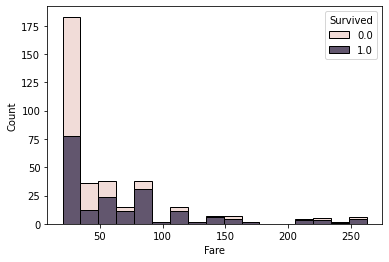

In [44]:
sns.histplot(data= EDA[EDA['Fare']> 20], x="Fare", hue="Survived", multiple="stack")

As we see, the higher the Fare, the higher the survival rate

## 2.8 SibSp+ Parch

In [45]:
EDA.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length
PassengerId,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,0,A,other
2,1.0,1,female,38.0,1,0,71.2833,C,C,P,8
3,1.0,3,female,26.0,0,0,7.9250,S,0,S,other
4,1.0,1,female,35.0,1,0,53.1000,S,C,1,6
5,0.0,3,male,35.0,0,0,8.0500,S,0,3,6


In [46]:
EDA['SibSp'].value_counts().head()

0    891
1    319
2     42
4     22
3     20
Name: SibSp, dtype: int64

In [47]:
EDA['Parch'].value_counts().head()


0    1002
1     170
2     113
3       8
5       6
Name: Parch, dtype: int64

In [48]:
EDA['Fare/Parch']= EDA['Fare']/(EDA['Parch']+1)
EDA['Fare/SibSp']= EDA['Fare']/(EDA['SibSp']+1)
EDA['Fare/Parch+SibSp']= EDA['Fare']/(EDA['Parch']+EDA['SibSp']+1)

In [49]:
EDA['Family_members']= EDA['Parch']+ EDA['SibSp'] +1

In [50]:
EDA.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length,Fare/Parch,Fare/SibSp,Fare/Parch+SibSp,Family_members
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,0,A,other,7.2500,3.62500,3.62500,2
2,1.0,1,female,38.0,1,0,71.2833,C,C,P,8,71.2833,35.64165,35.64165,2
3,1.0,3,female,26.0,0,0,7.9250,S,0,S,other,7.9250,7.92500,7.92500,1
4,1.0,1,female,35.0,1,0,53.1000,S,C,1,6,53.1000,26.55000,26.55000,2
5,0.0,3,male,35.0,0,0,8.0500,S,0,3,6,8.0500,8.05000,8.05000,1


<AxesSubplot:xlabel='SibSp', ylabel='Count'>

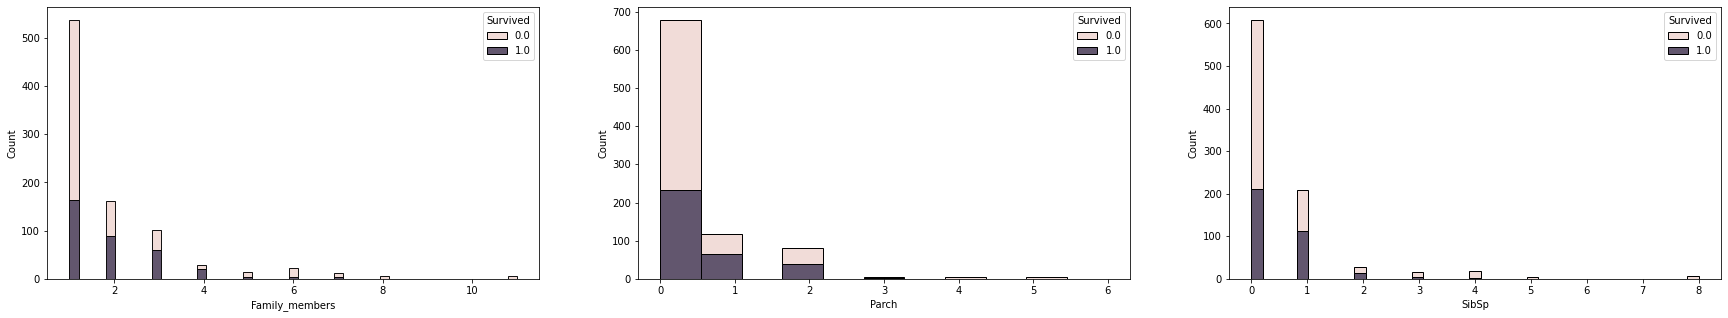

In [51]:
fig, axs= plt.subplots(1,3, figsize=(30,5))
sns.histplot(data= EDA, x="Family_members", hue="Survived", multiple="stack", ax= axs[0])
sns.histplot(data= EDA, x="Parch", hue="Survived", multiple="stack", ax= axs[1])
sns.histplot(data= EDA, x="SibSp", hue="Survived", multiple="stack", ax= axs[2])

In [52]:
EDA.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length,Fare/Parch,Fare/SibSp,Fare/Parch+SibSp,Family_members
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,0,A,other,7.2500,3.62500,3.62500,2
2,1.0,1,female,38.0,1,0,71.2833,C,C,P,8,71.2833,35.64165,35.64165,2
3,1.0,3,female,26.0,0,0,7.9250,S,0,S,other,7.9250,7.92500,7.92500,1
4,1.0,1,female,35.0,1,0,53.1000,S,C,1,6,53.1000,26.55000,26.55000,2
5,0.0,3,male,35.0,0,0,8.0500,S,0,3,6,8.0500,8.05000,8.05000,1


## 2.9 Scaling and OneHotEncoding

Correlation Matrix 

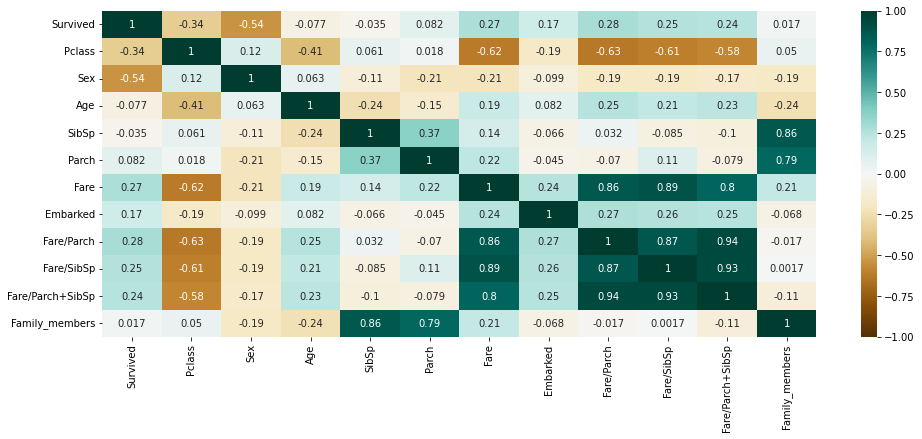

In [200]:
plt.figure(figsize=(16, 6))
train_for_corr= EDA.copy()
train_for_corr['Sex']= train_for_corr['Sex'].map({'male': 1, 'female': 0})
train_for_corr['Pclass']= train_for_corr['Pclass'].astype(int)
train_for_corr['Embarked']= train_for_corr['Embarked'].map({'S': 0, 'Q': 1, 'C':2})
heatmap = sns.heatmap(train_for_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [201]:
final_data= EDA.copy()

In [202]:
EDA.dtypes

Survived               float64
Pclass                  object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked                object
cabin_class             object
Ticket_first_symbol     object
Ticket_length           object
Fare/Parch             float64
Fare/SibSp             float64
Fare/Parch+SibSp       float64
Family_members           int64
dtype: object

In [203]:
final_data['cabin_class']= final_data['cabin_class'].astype(str)
final_data['Ticket_length']= final_data['Ticket_length'].astype(str)
final_data['Ticket_first_symbol']= final_data['Ticket_first_symbol'].astype(str)

In [204]:
final_data.isnull().sum().sort_values(ascending=False).head(4)

Survived    418
Age         263
Embarked      2
Pclass        0
dtype: int64

In [205]:
final_data.dropna(subset=['Embarked'], inplace= True)

In [206]:
final_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length,Fare/Parch,Fare/SibSp,Fare/Parch+SibSp,Family_members
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,0,A,other,7.2500,3.62500,3.62500,2
2,1.0,1,female,38.0,1,0,71.2833,C,C,P,8,71.2833,35.64165,35.64165,2
3,1.0,3,female,26.0,0,0,7.9250,S,0,S,other,7.9250,7.92500,7.92500,1
4,1.0,1,female,35.0,1,0,53.1000,S,C,1,6,53.1000,26.55000,26.55000,2
5,0.0,3,male,35.0,0,0,8.0500,S,0,3,6,8.0500,8.05000,8.05000,1


In [207]:
final_data.shape

(1307, 15)

In [208]:
y1= final_data[final_data['Age'].notnull()]['Survived']
y2= final_data[final_data['Age'].isnull()]['Survived']
y= pd.concat([y1,y2])

In [209]:
new_train= final_data[final_data['Age'].notnull()].drop(columns=['Survived'])
new_test= final_data[final_data['Age'].isnull()].drop(columns=['Survived', 'Age'])

In [210]:
new_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'cabin_class', 'Ticket_first_symbol', 'Ticket_length', 'Fare/Parch',
       'Fare/SibSp', 'Fare/Parch+SibSp', 'Family_members'],
      dtype='object')

In [211]:
new_train= new_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_class',
       'Ticket_first_symbol', 'Ticket_length', 'Fare/Parch', 'Fare/SibSp',
       'Fare/Parch+SibSp', 'Family_members', 'Age']]

In [212]:
new_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length,Fare/Parch,Fare/SibSp,Fare/Parch+SibSp,Family_members,Age
PassengerId,,,,,,,,,,,,,,
1,3,male,1,0,7.2500,S,0,A,other,7.2500,3.62500,3.62500,2,22.0
2,1,female,1,0,71.2833,C,C,P,8,71.2833,35.64165,35.64165,2,38.0
3,3,female,0,0,7.9250,S,0,S,other,7.9250,7.92500,7.92500,1,26.0
4,1,female,1,0,53.1000,S,C,1,6,53.1000,26.55000,26.55000,2,35.0
5,3,male,0,0,8.0500,S,0,3,6,8.0500,8.05000,8.05000,1,35.0


In [213]:
new_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,cabin_class,Ticket_first_symbol,Ticket_length,Fare/Parch,Fare/SibSp,Fare/Parch+SibSp,Family_members
PassengerId,,,,,,,,,,,,,
6,3,male,0,0,8.4583,Q,0,3,6,8.4583,8.4583,8.4583,1
18,2,male,0,0,13.0000,S,0,2,6,13.0000,13.0000,13.0000,1
20,3,female,0,0,7.2250,C,0,2,4,7.2250,7.2250,7.2250,1
27,3,male,0,0,7.2250,C,0,2,4,7.2250,7.2250,7.2250,1
29,3,female,0,0,7.8792,Q,0,3,6,7.8792,7.8792,7.8792,1


In [2]:
549/(549+340)

0.6175478065241845

dataset is a little imbalanced, but I won't balance it this time

In [214]:
index= np.append(new_train.index, new_test.index, axis=0)
index

array([   1,    2,    3, ..., 1305, 1308, 1309], dtype=int64)

In [215]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [216]:
categorical_columns= ['Pclass', 'Sex', 'Embarked', 'cabin_class', 'Ticket_first_symbol', 'Ticket_length']
numerical_columns= ['SibSp','Parch','Fare','Fare/Parch','Fare/SibSp', 'Fare/Parch+SibSp', 'Family_members']

In [217]:
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns),
)

In [218]:
new_y= new_train.pop('Age')

In [219]:
new_X = preprocessor.fit_transform(new_train)
new_test = preprocessor.transform(new_test)

# 3 -----------Filling NAs for Age-----------------

There isn't any hyperparameter optimisation, maybe I'll do it later

## 3.1 XGBoost

In [220]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split

In [221]:
X_train, X_valid, y_train, y_valid= train_test_split(new_X, new_y, train_size=0.9, random_state= 42)

In [222]:
model1 = XGBRegressor()
model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [223]:
cv = RepeatedKFold(n_splits= 5, n_repeats= 3, random_state= 42)
# evaluate model
scores = cross_val_score(model1, new_X, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 10.378 (0.432)


In [224]:
preds1= model1.predict(X_valid)
mean_absolute_percentage_error(preds1, y_valid)

0.5746467197916638

In [225]:
mean_absolute_error(preds1, y_valid)

11.918125728766123

## 3.2 Sklearn

In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
model2= RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [228]:
preds2= model2.predict(X_valid)
mean_absolute_error(preds2, y_valid)

10.856068304254498

In [229]:
mean_absolute_percentage_error(preds2, y_valid)

0.4328238250120557

In [230]:
preds= (preds1+ preds2)/2
mean_absolute_percentage_error(preds, y_valid)

0.4648809607548232

In [231]:
# np.savez('age_train',inputs= x_train, targets= y_train)
# np.savez('age_test',inputs= new_test)

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
preds3 = model3.predict(X_valid)
mean_absolute_percentage_error(preds3, y_valid)

0.4013414177010102

In [234]:
preds= (preds1 + preds2 + preds3)/ 3
mean_absolute_percentage_error(preds, y_valid)

0.40422328368822996

## 3.3 LightGBM

In [235]:
from lightgbm import LGBMRegressor

In [236]:
model4= LGBMRegressor()
model4.fit(X_train, y_train)
preds4= model4.predict(X_valid)
mean_absolute_percentage_error(preds4, y_valid)

0.4396515012622314

In [237]:
preds= (preds1 + preds2 + preds3+ preds4)/ 4
mean_absolute_percentage_error(preds, y_valid)

0.4075844563870255

## 3.4 CatBoost

In [238]:
from catboost import CatBoostRegressor

In [239]:
model5= CatBoostRegressor(verbose=0)
model5.fit(X_train, y_train)
preds5= model5.predict(X_valid)
mean_absolute_percentage_error(preds5, y_valid)

0.398752715311708

In [240]:
preds= (preds1 + preds2 + preds3+ preds4+ preds5)/ 5
mean_absolute_percentage_error(preds, y_valid)

0.404122936875402

## 3.5 Ensemble

In [241]:
preds1= model1.predict(new_test)
preds2= model2.predict(new_test)
preds3= model3.predict(new_test)
preds4= model4.predict(new_test)
preds5= model5.predict(new_test)

results= (preds1 + preds2 + preds3+ preds4+ preds5)/ 5
results[0:5]

array([30.48853268, 33.73950204, 26.39994731, 27.1608054 , 22.61685012])

In [242]:
results.shape

(263,)

In [243]:
results= results.reshape(263,1)

In [244]:
final_without_age= np.append(new_test, results, axis=1)

In [245]:
final_without_age

array([[-0.552242  , -0.5017629 , -0.54457098, ...,  0.        ,
         0.        , 30.48853268],
       [-0.552242  , -0.5017629 , -0.44838948, ...,  0.        ,
         0.        , 33.73950204],
       [-0.552242  , -0.5017629 , -0.57068909, ...,  0.        ,
         0.        , 26.39994731],
       ...,
       [-0.552242  , -0.5017629 , -0.55321772, ...,  0.        ,
         1.        , 27.42279711],
       [-0.552242  , -0.5017629 , -0.55321772, ...,  0.        ,
         0.        , 29.21797391],
       [ 0.54384289,  0.68878361, -0.25020481, ...,  0.        ,
         0.        , 17.93488098]])

## 3.6 Join predictions with columns having Age

In [246]:
y_with_age= np.array(new_y)
y_with_age= y_with_age.reshape(1044,1)
y_with_age.shape

(1044, 1)

In [247]:
final_with_age= np.append(new_X, y_with_age, axis=1)
final_with_age

array([[ 0.54384289, -0.5017629 , -0.57015966, ...,  0.        ,
         1.        , 22.        ],
       [ 0.54384289, -0.5017629 ,  0.7859006 , ...,  1.        ,
         0.        , 38.        ],
       [-0.552242  , -0.5017629 , -0.5558649 , ...,  0.        ,
         1.        , 26.        ],
       ...,
       [-0.552242  , -0.5017629 , -0.55904151, ...,  0.        ,
         0.        , 28.        ],
       [-0.552242  , -0.5017629 ,  1.58252535, ...,  1.        ,
         0.        , 39.        ],
       [-0.552242  , -0.5017629 , -0.57015966, ...,  0.        ,
         1.        , 38.        ]])

In [248]:
index= index.reshape(index.shape[0],1)

In [249]:
final_train= np.append(final_with_age, final_without_age, axis=0)
final_train= np.append(index, final_train, axis=1)

In [250]:
final_train.shape

(1307, 37)

In [251]:
y.value_counts(dropna= False)

0.0    549
NaN    418
1.0    340
Name: Survived, dtype: int64

In [252]:
final_y = np.array(y)
final_y= final_y.reshape(1307,1)

In [253]:
final= np.append(final_train, final_y, axis=1)
final

array([[ 1.00000000e+00,  5.43842886e-01, -5.01762895e-01, ...,
         1.00000000e+00,  2.20000000e+01,  0.00000000e+00],
       [ 2.00000000e+00,  5.43842886e-01, -5.01762895e-01, ...,
         0.00000000e+00,  3.80000000e+01,  1.00000000e+00],
       [ 3.00000000e+00, -5.52242004e-01, -5.01762895e-01, ...,
         1.00000000e+00,  2.60000000e+01,  1.00000000e+00],
       ...,
       [ 1.30500000e+03, -5.52242004e-01, -5.01762895e-01, ...,
         1.00000000e+00,  2.74227971e+01,             nan],
       [ 1.30800000e+03, -5.52242004e-01, -5.01762895e-01, ...,
         0.00000000e+00,  2.92179739e+01,             nan],
       [ 1.30900000e+03,  5.43842886e-01,  6.88783611e-01, ...,
         0.00000000e+00,  1.79348810e+01,             nan]])

In [254]:
final = final[np.argsort(final[:, 0])]
final = final[:, 1:]

In [255]:
final

array([[ 0.54384289, -0.5017629 , -0.57015966, ...,  1.        ,
        22.        ,  0.        ],
       [ 0.54384289, -0.5017629 ,  0.7859006 , ...,  0.        ,
        38.        ,  1.        ],
       [-0.552242  , -0.5017629 , -0.5558649 , ...,  1.        ,
        26.        ,  1.        ],
       ...,
       [-0.552242  , -0.5017629 , -0.57015966, ...,  1.        ,
        38.        ,         nan],
       [-0.552242  , -0.5017629 , -0.55321772, ...,  0.        ,
        29.21797391,         nan],
       [ 0.54384289,  0.68878361, -0.25020481, ...,  0.        ,
        17.93488098,         nan]])

In [256]:
test_indices= np.where(np.isnan(final[:,-1]))
train_indices= np.where(~np.isnan(final[:,-1]))

In [257]:
test= final[test_indices]
train= final[train_indices]

In [258]:
test= test[:,:-1]
test

array([[-0.552242  , -0.5017629 , -0.5578937 , ...,  0.        ,
         0.        , 34.        ],
       [ 0.54384289, -0.5017629 , -0.57545402, ...,  0.        ,
         0.        , 47.        ],
       [-0.552242  , -0.5017629 , -0.51853969, ...,  0.        ,
         0.        , 62.        ],
       ...,
       [-0.552242  , -0.5017629 , -0.57015966, ...,  0.        ,
         1.        , 38.        ],
       [-0.552242  , -0.5017629 , -0.55321772, ...,  0.        ,
         0.        , 29.21797391],
       [ 0.54384289,  0.68878361, -0.25020481, ...,  0.        ,
         0.        , 17.93488098]])

In [259]:
np.savez('data_preprocessed', train= train, test= test)